<a href="https://colab.research.google.com/github/Joyfull-Joyal/sign_language_interprter_Main-Project/blob/New1/Yolov8_epoch_10_class_106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Apr 12 07:17:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [7]:
ROOT_PATH = "/content/drive/MyDrive/yolov8"

In [8]:
%cd "/content/drive/MyDrive/yolov8"

/content/drive/MyDrive/yolov8


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t6uP8Tk9iL77cjRPexFM")
project = rf.workspace("majorproject-25tao").project("american-sign-language-v36cz")
version = project.version(2)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-sign-language-2 in yolov8-obb:: 100%|██████████| 40560/40560 [05:52<00:00, 114.94it/s]


In [10]:
%cd "/content/drive/MyDrive/yolov8/American-sign-language-2"

/content/drive/MyDrive/yolov8/American-sign-language-2


In [12]:
!yolo task=segment mode=train model=yolov8m-seg.pt data=data.yaml epochs=10 imgsz=640 save=true batch=32

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=data.yaml, epochs=10, patience=50, batch=32, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=F

In [14]:
!ls runs/segment/train2/

args.yaml					    MaskP_curve.png   val_batch0_labels.jpg
BoxF1_curve.png					    MaskPR_curve.png  val_batch0_pred.jpg
BoxP_curve.png					    MaskR_curve.png   val_batch1_labels.jpg
BoxPR_curve.png					    results.csv       val_batch1_pred.jpg
BoxR_curve.png					    results.png       val_batch2_labels.jpg
confusion_matrix.png				    train_batch0.jpg  val_batch2_pred.jpg
events.out.tfevents.1712907034.4851b0665cde.5464.0  train_batch1.jpg  weights
MaskF1_curve.png				    train_batch2.jpg


In [17]:
!yolo task=segment mode=val model=runs/segment/train2/weights/best.pt data=data.yaml

2024-04-12 10:35:54.194639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 10:35:54.194696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 10:35:54.196165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 10:35:55.731562: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27283758 parameters, 0 gradients, 110.3 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/American-sign-language

In [19]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolov8/American-sign-language-2/test/images save=true


2024-04-12 10:40:23.144877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 10:40:23.144939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 10:40:23.146252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 10:40:24.471729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27283758 parameters, 0 gradients, 110.3 GFLOPs

image 1/822 /content/drive/MyDrive/yolov8/American-sign-language-

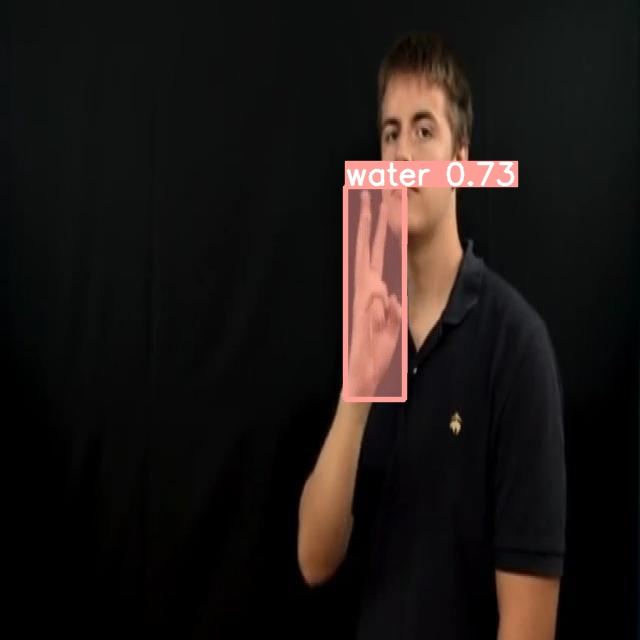

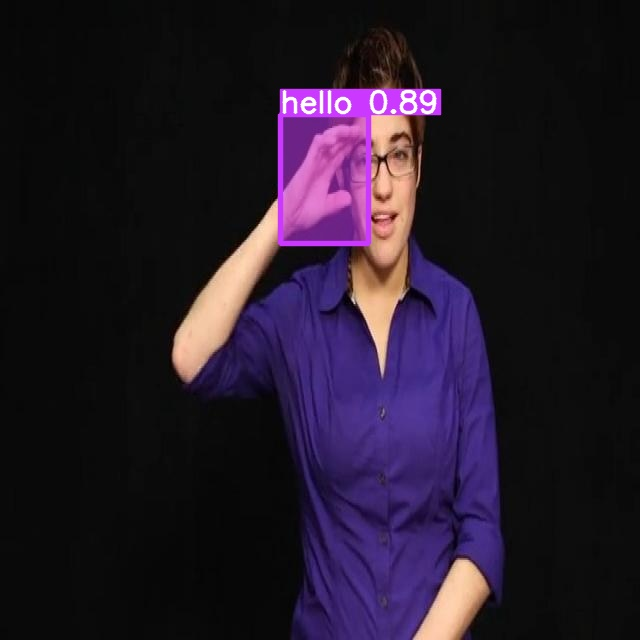

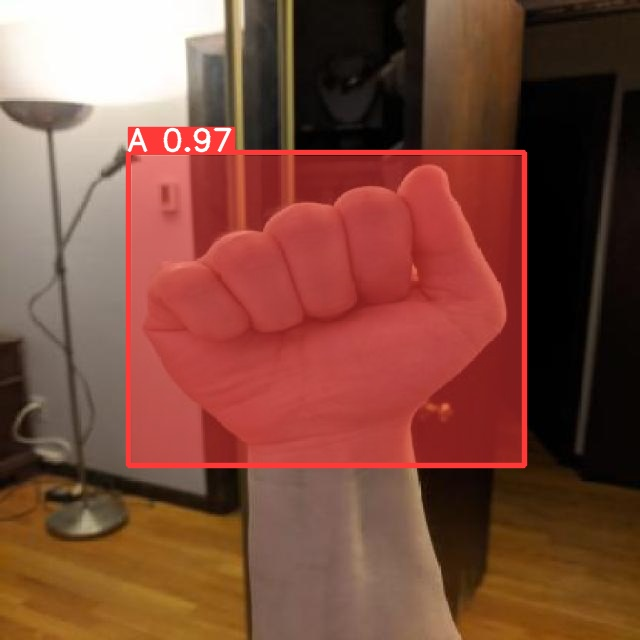

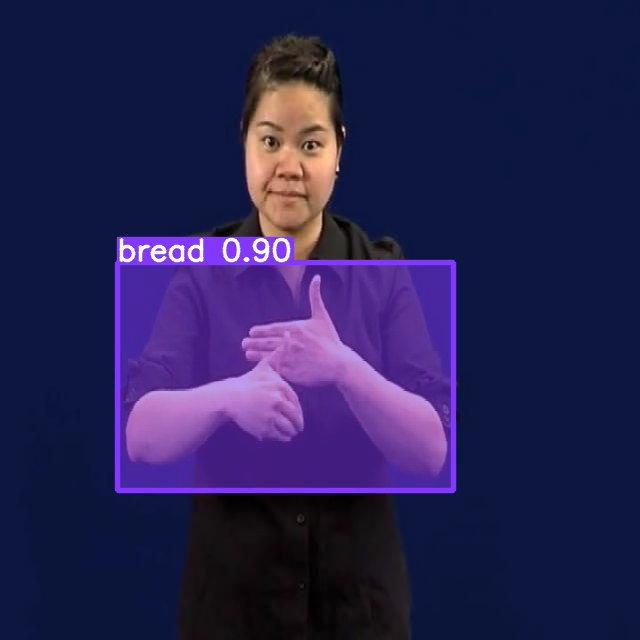

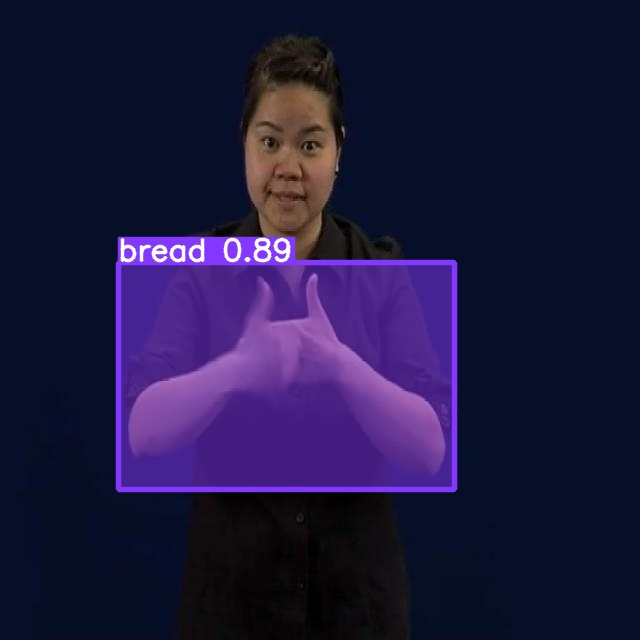

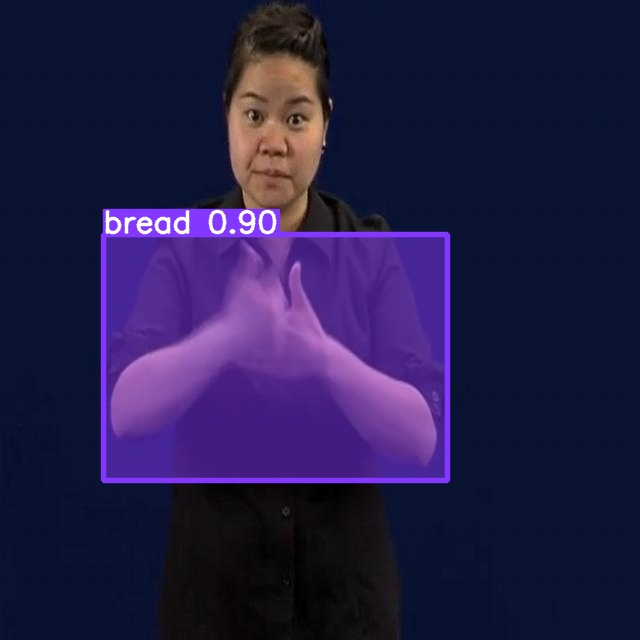

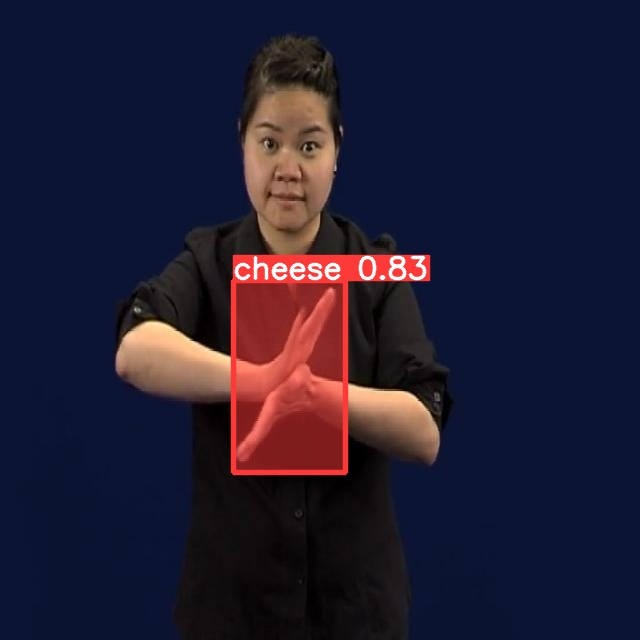

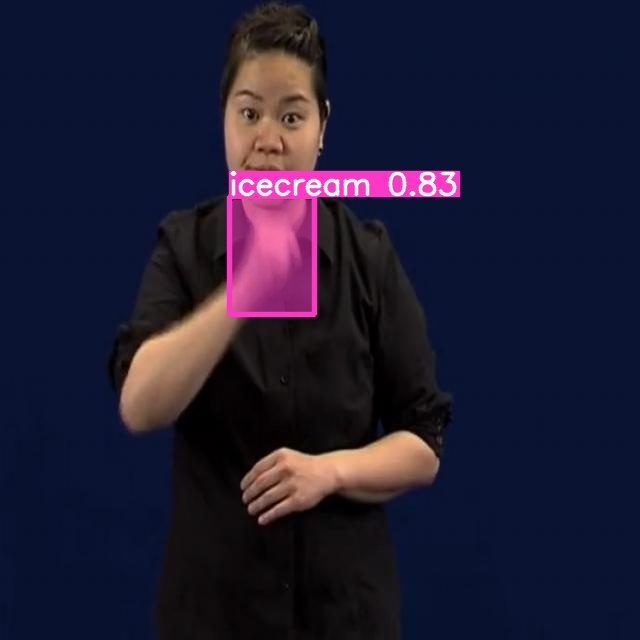

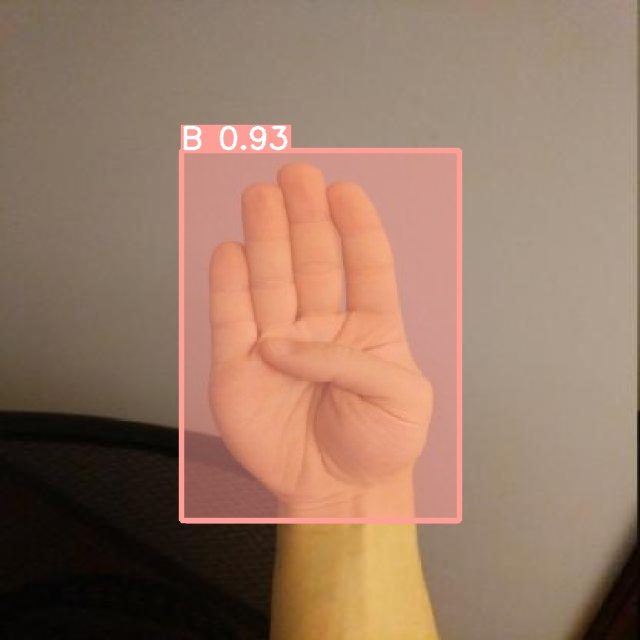

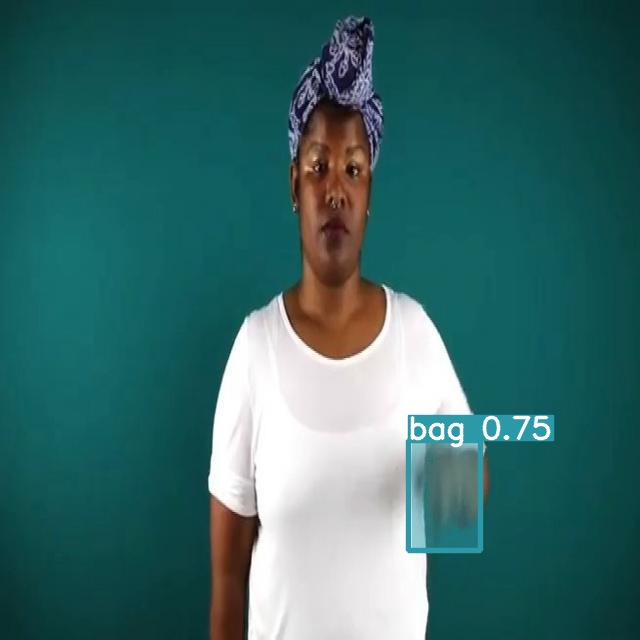

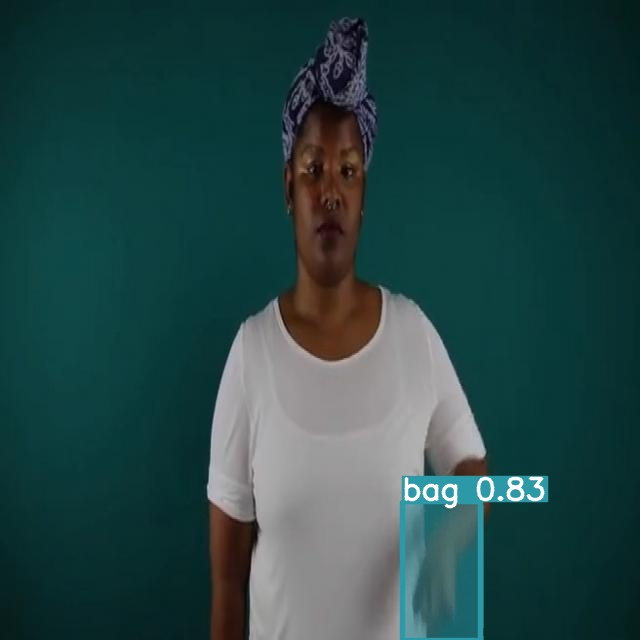

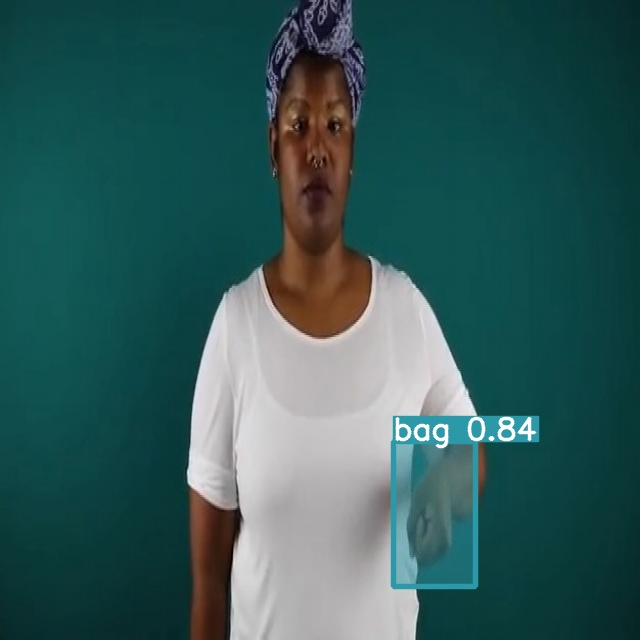

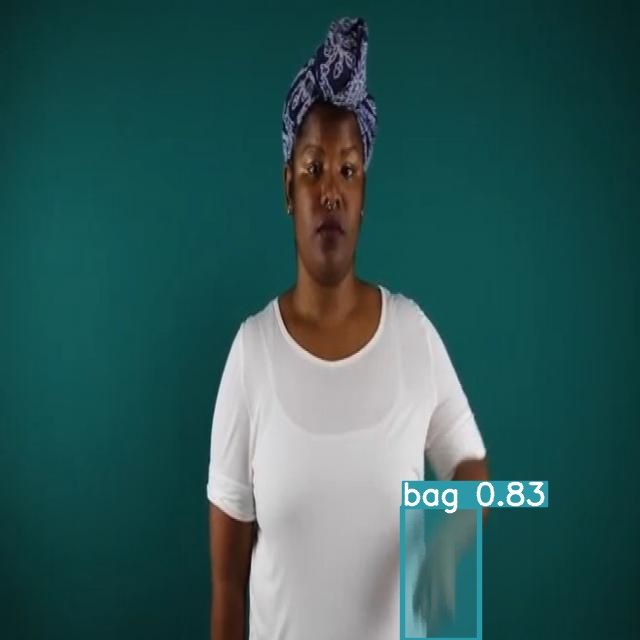

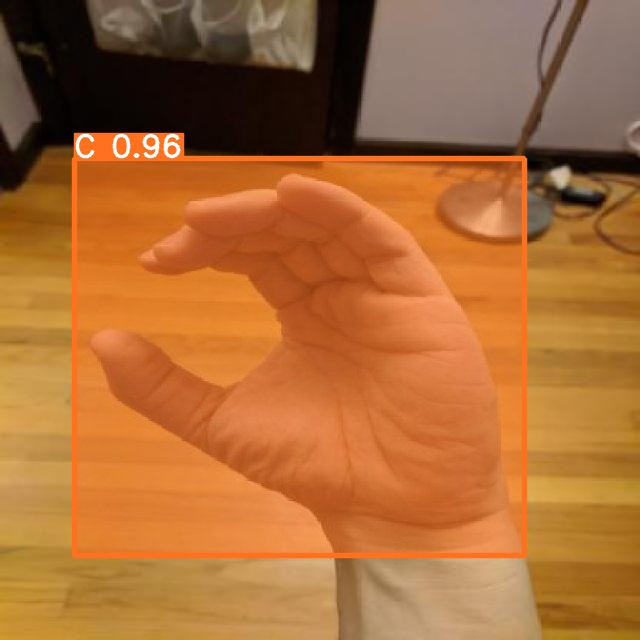

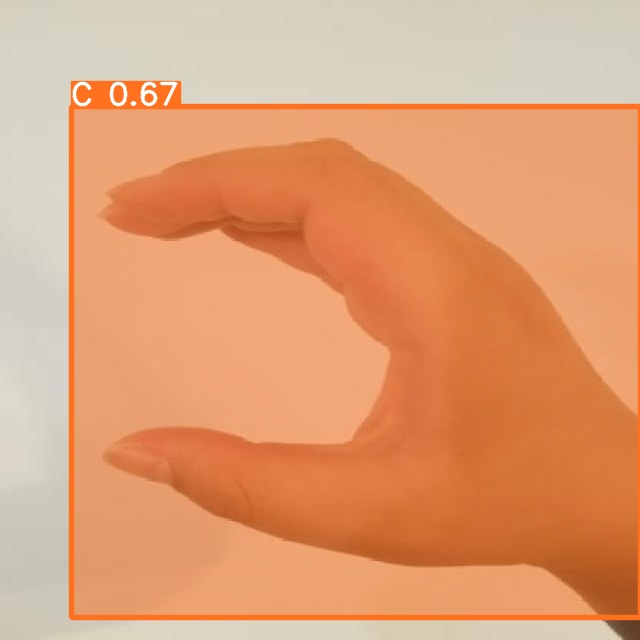

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[15:30]:
      display(Image(filename=image_path, height=600))
      print("\n")